In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import us

In [3]:
colnames = ["date", "city", "state", "country", "shape",
          "duration_seconds", "duration_reported", "description",
          "report_date", "latitude", "longitude"]
ufo = pd.read_csv('/home/hbgrob/work/data-readonly/ufo-scrubbed-geocoded-time-standardized.csv', names = colnames, 
                  parse_dates=['date', 'report_date'])


In [6]:
'''this removes all the non-US cities from the dataset'''

ufo['country'].map(lambda x: x == 'us')
#some intense black magic here
ufo_us = ufo[ufo['country'].map(lambda x: x == 'us')]
ufo_us['state'] = ufo_us['state'].apply(lambda x: x.upper())
ufo_us.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,city,state,country,shape,duration_seconds,duration_reported,description,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,TX,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
3,1956-10-10 21:00:00,edna,TX,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,HI,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
5,1961-10-10 19:00:00,bristol,TN,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889
7,1965-10-10 23:45:00,norwalk,CT,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.117500,-73.408333


In [16]:
ufo_state_count=ufo_us.groupby('state')['city'].count()
#add another column that pulls out year
ufo_us['year'] = ufo_us['date'].apply(lambda x: x.year)
#ufo_state_count.plot()
#ufo_state_year.head()


#groupby year by state

#groupby year by state for total duration

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


year
1910       2
1920       1
1925       1
1929       1
1931       2
1934       1
1936       1
1937       2
1939       3
1941       1
1942       2
1943       1
1944       3
1945       7
1946       8
1947      33
1948       7
1949      15
1950      21
1951      13
1952      37
1953      26
1954      38
1955      25
1956      39
1957      62
1958      42
1959      43
1960      51
1961      41
        ... 
1985     171
1986     153
1987     176
1988     188
1989     200
1990     191
1991     180
1992     183
1993     228
1994     324
1995     915
1996     646
1997    1009
1998    1404
1999    2253
2000    2184
2001    2445
2002    2439
2003    2958
2004    3244
2005    3228
2006    2884
2007    3470
2008    4017
2009    3677
2010    3548
2011    4379
2012    6320
2013    6056
2014    1964
Name: state, Length: 83, dtype: int64

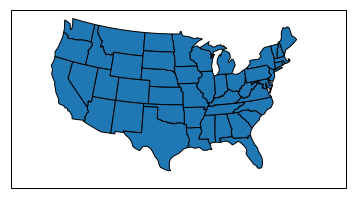

In [5]:
'''We may use this later, but I wanted to keep it in here. This is the graph that looks like the US:'''


#From Class
#Also a test to make sure I have an idea what I'm doing
#coming back to this, I'm not sure if we need/want this
states =cartopy.io.shapereader.natural_earth(resolution='110m', category='cultural',name='admin_1_states_provinces_lakes_shp')
reader = cartopy.io.shapereader.Reader(states)
all_states = list(reader.records())

geometries = [state.geometry for state in all_states]
fig = plt.figure()
ax = fig.add_subplot(111,projection = cartopy.crs.LambertConformal())
ax.set_extent([-125,-66.5,20,50], cartopy.crs.Geodetic())
ax.add_geometries(geometries, crs=cartopy.crs.PlateCarree(), edgecolors='k')


#tool tips, used in BQplot
#state name, total sightings, avg alcohol, maybe total duration

In [ ]:
#redo map with alcohol normalization

In [ ]:
#line plot with alcohol consumption through year
#try to make the title after the name of the state